# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](attachment:pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [ ]:
# 連線至 Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

### training data
anger_train = pd.read_csv("/content/drive/My Drive/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("/content/drive/My Drive/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("/content/drive/My Drive/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("/content/drive/My Drive/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [ ]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
# shuffle dataset
train_df = train_df.sample(frac=1)  # shuffle but not reindex
test_df = test_df.sample(frac=1)

In [ ]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# After shuffle then reindex

train_df.reset_index( drop = True, inplace = True)
test_df.reset_index( drop = True, inplace = True)

In [ ]:
# Train Data

count_vect_train_data = CountVectorizer()
X_counts_train_data = count_vect_train_data.fit_transform(train_df['text'])
words_train_data = count_vect_train_data.get_feature_names_out()
term_document_df_train_data = pd.DataFrame( X_counts_train_data.toarray(), columns = words_train_data )
term_document_df_train_data.head(3)

# Test_Data

count_vect_test_data = CountVectorizer()
X_counts_test_data = count_vect_test_data.fit_transform(test_df['text'])
words_test_data = count_vect_test_data.get_feature_names_out()
term_document_df_test_data = pd.DataFrame( X_counts_test_data.toarray(), columns = words_test_data )
term_document_df_test_data.head(3)


,10,11,11am,12,12s,138,158,15gets20,16,17,...,young,your,youraffair,yourself,youthful,yungdoujin,zen,zeroalcohol,zubairsabirpti,الخفجي
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


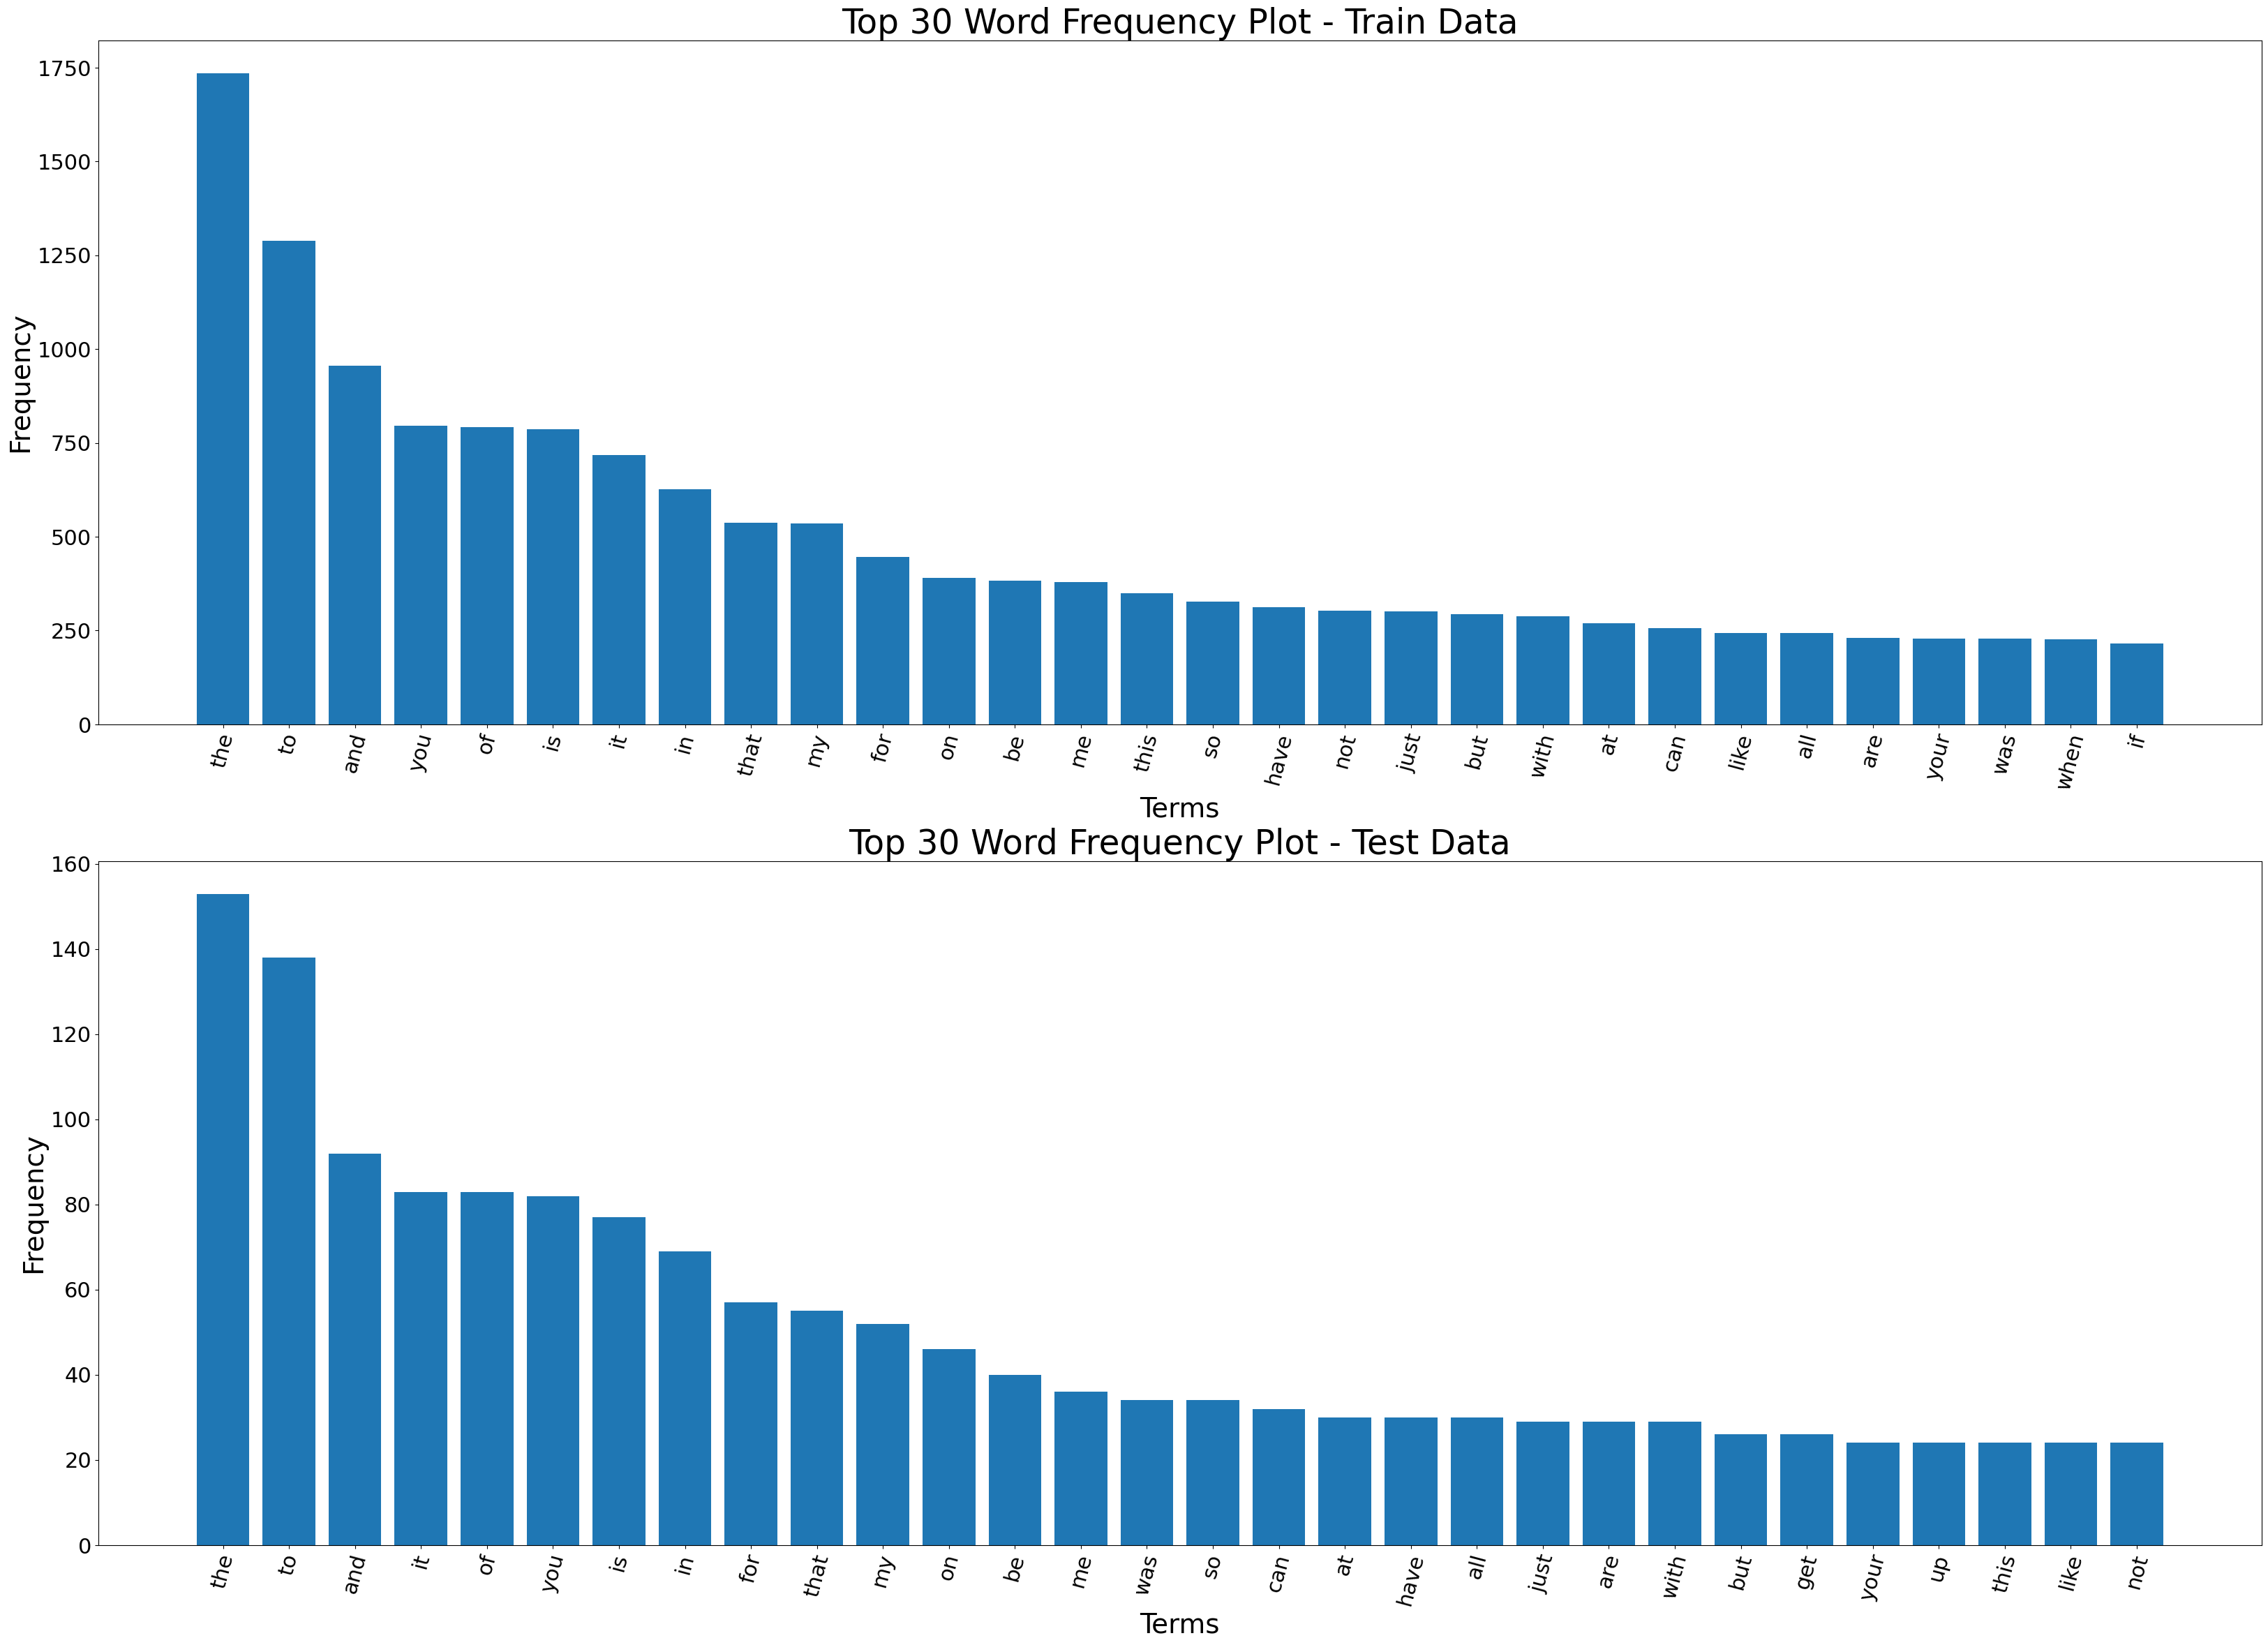

In [ ]:
word_counts_train_data = term_document_df_train_data.sum(axis = 0 ).to_numpy()
top30_index_train_data = np.argsort(word_counts_train_data)[::-1][:30]


word_counts_test_data = term_document_df_test_data.sum(axis = 0 ).to_numpy()
top30_index_test_data = np.argsort(word_counts_test_data)[::-1][:30]

plt.figure(figsize = [40,28] )


plt.subplot(2,1,1)

plt.bar( x = term_document_df_train_data.columns[top30_index_train_data],
         height = word_counts_train_data[top30_index_train_data])

plt.title("Top 30 Word Frequency Plot - Train Data", size = 35)

plt.xlabel("Terms", size = 28)
plt.ylabel("Frequency", size = 28)

plt.xticks(rotation =  75, fontsize = 22)
plt.yticks(fontsize = 22)


plt.subplot(2,1,2)

plt.bar( x = term_document_df_test_data.columns[top30_index_test_data],
         height = word_counts_test_data[top30_index_test_data])

plt.title("Top 30 Word Frequency Plot - Test Data", size = 35)

plt.xlabel("Terms", size = 28)
plt.ylabel("Frequency", size = 28)

plt.xticks(rotation =  75, fontsize = 22)
plt.yticks(fontsize = 22)

plt.show()

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [ ]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [ ]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [ ]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

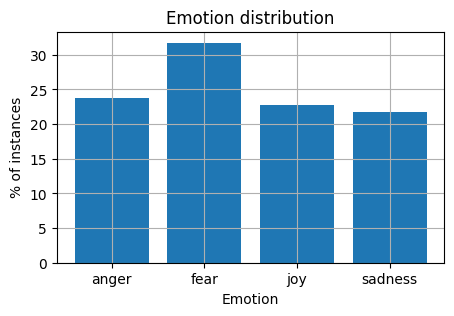

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [ ]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [ ]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [ ]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [ ]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [ ]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld(表情符號) better performance than counterparts)

In [ ]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [ ]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

c:\Anaconda3\envs\Tensorflow2\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [ ]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [ ]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Answer here
TF_IDF_vectorizer =  TfidfVectorizer(max_features=1000)
output_vectorizer = TF_IDF_vectorizer.fit_transform(train_df['text'])

In [ ]:
terms_tf_idf = TF_IDF_vectorizer.get_feature_names_out()
terms_tf_idf[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'sadness', 'fear', 'anger', 'fear', 'fear', 'sadness',
       'fear', 'anger', 'joy'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

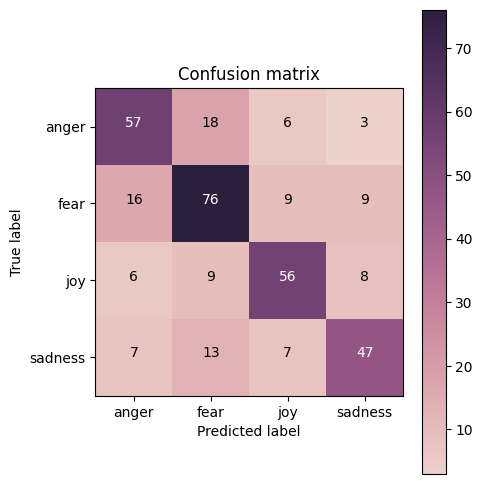

In [ ]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

The training accuracy 99 % indicates that the model fits the training data well. However, the testing accuracy is 68 % suggesting potential overfitting. We might consider adjusting model.

- **Anger** :
    - The precision is 66% (57/(57+16+6+7)), which means the prediction for "Anger" are correct 66 % of the time. Among the remaining 33%, **Fear** is the most frequent misclassified category.
    
    - The recall is 68% (57/(57+18+6+3)), which indicates around 68 % of true "Anger" are predicted correctly. Among the remaining 32%, **Fear** is again the most frequent misclassified category.

- **Fear** :
    - The precision is 66% (76/(76+18+9+13)), which means the prediction for "Fear" are correct 66 % of the time. Among the remaining 33%, **Anger** is the most frequent misclassified category.
    
    - The recall is 69% (76/(16+76+9+9)), which indicates around 68 % of true "Fear" are predicted correctly. Among the remaining 31%, **Anger** is again the most frequent misclassified category.

- **Joy** :
    - The precision is 72% (56/(6+9+56+7)), which means the prediction for "Joy" are correct 72 % of the time. Among the remaining 28%, **Anger**、**Fear**、**Sadness** are possible misclassified category.
    
    - The recall is 71% (56/(8+56+6+9)), which indicates around 71% of true "Joy" are predicted correctly. Among the remaining 29%, **Anger**、**Fear**、**Sadness** again are all possible misclassified category.
    
- **Sadness** :
    - The precision is 70% (47/(8+9+47+3)), which means the prediction for "Sadness" are correct 70 % of the time. Among the remaining 30%, **Fear**、**Joy** are possible misclassified category.
    
    - The recall is 64% (47/(7+13+47+7)), which indicates around 64% of true "Sadness" are predicted correctly. Among the remaining 36%, **Fear** is the most possible misclassified category.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

- Since X_train is word count, it's suitable to use Muiltinomial NB Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Training
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Testing
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'sadness', 'fear', 'anger', 'fear', 'fear', 'anger',
       'fear', 'joy', 'joy'], dtype='<U7')

In [ ]:
# Answer here
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('Mul NB_training accuracy: {}'.format(round(acc_train, 2)))
print('Mul NB_testing accuracy: {}'.format(round(acc_test, 2)))

Mul NB_training accuracy: 0.79
Mul NB_testing accuracy: 0.7


In [ ]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


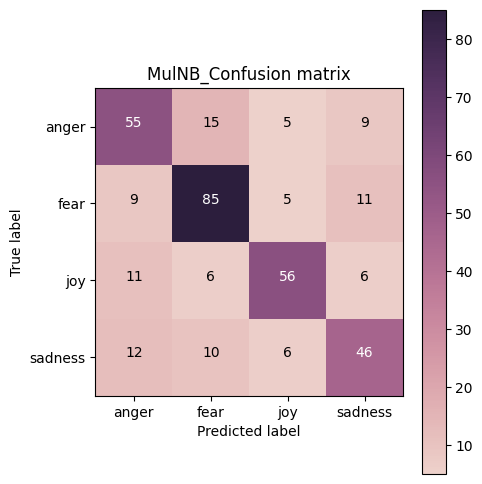

In [ ]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='MulNB_Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

| Performance | Naive Bayes | Decision Tree |
| --- | --- | --- |
|Training Accuracy(%)| 79| 99|
|Testing Accuracy(%)| 70| 68|

According to the above table, we can see Decision Tree has higher Training Accuracy than Naive Bayes.

Decision tree is based on your data to construct a customized tree (following the information gain rule ), so it tend to achieve higher training accuracy. On the other hand, it's more sensitive to overfit model which explain the significant difference between Training (99%) and Testing accuracy(68%).

Naive Bayes is a simple classfier with the assumption of conditional independence which is hardly satisfied in our dataframe. As a result, our Training Accuracy is low (79%).

In my opinion, the reason Naive Bayes has higher testing accuracy is the category distribution is similar with training one (we can see the bar plot below). Because the prior probability influences significantly to our result.

$ P(Y_{i}|X) = \frac{P(X|Y) * P(Y)}{P(X)} $  
$P(Y)$ is the prior probability.

In [ ]:
y_test.value_counts().values.sum()

347

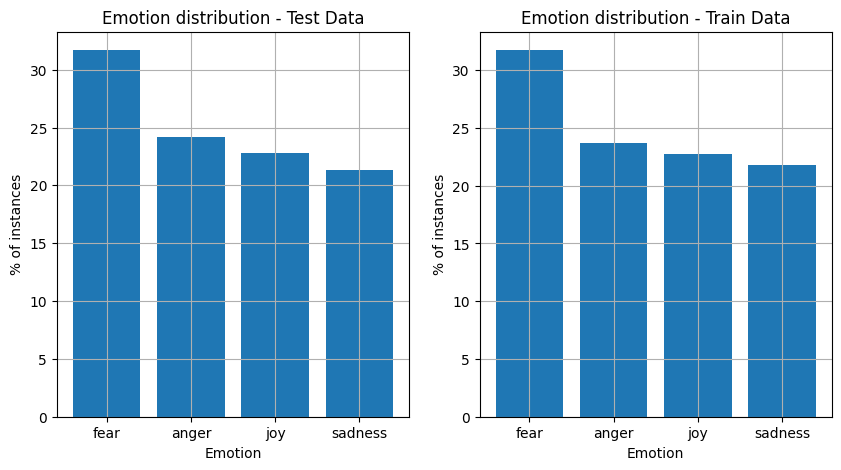

In [ ]:
#plot
plt.figure( figsize = [10,5] )
plt.subplot(1,2,1)

temp_value = y_test.value_counts().values
plt.bar(y_test.value_counts().index, temp_value*100/(temp_value.sum()))

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution - Test Data')
plt.grid(True)


plt.subplot(1,2,2)
temp_value = y_train.value_counts().values
plt.bar(y_train.value_counts().index, temp_value*100/(temp_value.sum()))

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution - Train Data')
plt.grid(True)


plt.show()

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](attachment:pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [ ]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
import keras

In [ ]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 0       fear
1        joy
2       fear
3    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [ ]:
# I/O check
input_shape = X_train.shape[1] # (3613, 500) # 500 features
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](attachment:pic2.png)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


c:\Anaconda3\envs\Tensorflow2\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3274 - loss: 1.3612 - val_accuracy: 0.4669 - val_loss: 1.2697
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6243 - loss: 1.0762 - val_accuracy: 0.6427 - val_loss: 0.9168
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7988 - loss: 0.6055 - val_accuracy: 0.7349 - val_loss: 0.7600
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8529 - loss: 0.4180 - val_accuracy: 0.6974 - val_loss: 0.7818
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8797 - loss: 0.3411 - val_accuracy: 0.7061 - val_loss: 0.7812
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9092 - loss: 0.2651 - val_accuracy: 0.7032 - val_loss: 0.8065
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9306 - loss: 0.2199 - val_accuracy: 0.6686 - val_loss: 0.8821
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9459 - loss: 0.1805 - val_accuracy: 0.6571 - val_

### 6.5 Predict on testing data

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[8.9179935e-09, 2.1617791e-02, 5.2979545e-13, 9.7838223e-01],
       [1.5773933e-02, 9.5356578e-01, 2.1077300e-04, 3.0449444e-02],
       [3.2590983e-06, 9.9999142e-01, 2.2367972e-08, 5.3040071e-06],
       [9.9715412e-01, 1.2586368e-03, 2.9708768e-04, 1.2902268e-03],
       [9.3169747e-06, 9.9998844e-01, 1.3613737e-06, 8.7472426e-07]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'fear', 'fear', 'anger', 'fear'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.369222,1.327767,0.466859,1.269698
1,1,0.657348,0.975399,0.642651,0.916834
2,2,0.794631,0.583174,0.734870,0.760046
3,3,0.841129,0.427510,0.697406,0.781813
4,4,0.876834,0.341887,0.706052,0.781158
5,5,0.902297,0.278617,0.703170,0.806537
6,6,0.920288,0.235498,0.668588,0.882066
7,7,0.934127,0.198543,0.657061,0.961853
8,8,0.943260,0.168472,0.680115,1.000923
9,9,0.955992,0.143953,0.671470,1.076658


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](attachment:pic3.png)


![pic4.png](attachment:pic4.png)

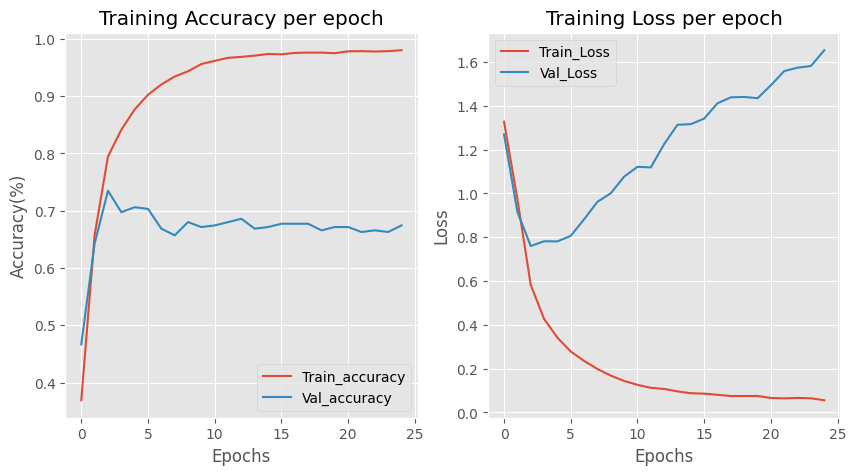

In [ ]:
plt.figure(figsize = [10,5])

plt.style.use('ggplot')


plt.subplot(1,2,1)

plt.plot(training_log.epoch, training_log.accuracy)

plt.plot(training_log.epoch, training_log.val_accuracy)


plt.legend(["Train_accuracy", "Val_accuracy"])
plt.title("Training Accuracy per epoch")


plt.ylabel("Accuracy(%)")
plt.xlabel("Epochs")


plt.subplot(1,2,2)

plt.plot(training_log.epoch, training_log.loss)

plt.plot(training_log.epoch, training_log.val_loss)


plt.legend(["Train_Loss", "Val_Loss"])
plt.title("Training Loss per epoch")


plt.ylabel("Loss")
plt.xlabel("Epochs")



plt.show()

- Accuracy Plot
- Loss Plot

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
0,20638,@BBs_Coffee somebody needs tell staff at Readi...,"[@, BBs_Coffee, somebody, needs, tell, staff, ..."
1,30660,Question for all the cheerleaders who ages out...,"[Question, for, all, the, cheerleaders, who, a..."
2,20740,@carlybigelow13 first you take the room now yo...,"[@, carlybigelow13, first, you, take, the, roo..."
3,40467,It's my last week at CN! I'm gonna be sad to l...,"[It, 's, my, last, week, at, CN, !, I, 'm, gon..."
4,20875,"2,034 words today #amwriting #horror #novel 42...","[2,034, words, today, #, amwriting, #, horror,..."


In [ ]:
## create the training corpus

# 語料庫 corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'BBs_Coffee', 'somebody', 'needs', 'tell', 'staff', 'at', 'Reading', 'cappuccino', 'is', 'supposed', 'to', 'have', 'a', 'thick', 'layer', 'of', 'foam', 'and', 'coffee', 'should', 'be', 'hot', '#', 'awful', 'again']),
       list(['Question', 'for', 'all', 'the', 'cheerleaders', 'who', 'ages', 'out', '!', '!', '\\nHow', 'to', 'I', 'make', 'my', 'senior', 'year', 'of', 'cheer', 'more', 'memorable']),
       list(['@', 'carlybigelow13', 'first', 'you', 'take', 'the', 'room', 'now', 'you', 'wan', 'na', 'beat', 'me', 'up'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
from gensim.models import Word2Vec

## setting
vector_dim = 100  # How many nodes
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)



# sentence : a list of lists of tokens, but for larger corpora

# vector_size : Dimensionality of the word vectors

# window : Maximum distance between the current and predicted word within a sentence

# min_count : Ignores all words with total frequency lower than this

# epochs : Number of iterations (epochs) over the corpus

2024-11-20 18:00:22,295 : INFO : collecting all words and their counts
2024-11-20 18:00:22,296 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-11-20 18:00:22,324 : INFO : collected 11884 word types from a corpus of 72464 raw words and 3613 sentences
2024-11-20 18:00:22,348 : INFO : Creating a fresh vocabulary
2024-11-20 18:00:22,405 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 11884 unique words (100.00% of original 11884, drops 0)', 'datetime': '2024-11-20T18:00:22.405527', 'gensim': '4.3.3', 'python': '3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'prepare_vocab'}
2024-11-20 18:00:22,405 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 72464 word corpus (100.00% of original 72464, drops 0)', 'datetime': '2024-11-20T18:00:22.405527', 'gensim': '4.3.3', 'python': '3.11.9 | packaged by Anaconda, Inc. | (m

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [ ]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec # (100,)

array([ 0.0510509 ,  0.19871984, -0.00299899,  0.13426611, -0.14865479,
       -0.9600739 ,  0.60402215,  1.1479045 , -0.3820981 , -0.23396342,
       -0.49701536, -0.3415883 , -0.4612067 ,  0.6264082 , -0.18400599,
       -0.36994344,  0.2781976 , -1.0088089 ,  0.27799204, -1.3475926 ,
        1.1603206 ,  0.6907483 ,  0.6244304 ,  0.16117024,  0.4796694 ,
        0.06219659, -0.66641283,  0.5171016 , -0.47962466,  0.61152303,
        0.23964845, -0.13673641,  0.52079004, -0.35961205,  0.18386714,
        0.6360068 ,  0.03856706, -0.25839666, -0.64866734, -0.6162162 ,
       -0.23113059, -0.37620187, -0.27210212,  0.17555806,  0.66228914,
       -0.5332074 , -0.63974315,  0.23260447,  0.85985297,  0.3504309 ,
        0.28929898, -0.4558398 ,  0.08464275,  0.09001211, -0.51878685,
       -0.24381019, -0.33180386, -0.07589217,  0.12762472,  0.03469537,
        0.31005973, -0.1794487 ,  0.4120786 ,  0.39436164, -0.6128771 ,
        0.9531059 ,  0.51929855,  0.6511024 , -1.0458536 ,  0.70

In [ ]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[("'you", 0.9302608370780945),
 ('Be', 0.9212767481803894),
 ('birthday', 0.9200767278671265),
 ('blessing', 0.9196062684059143),
 ('blessed', 0.9112473726272583),
 ('.\\nA', 0.9082064628601074),
 ('help', 0.9074726700782776),
 ('nuclear', 0.9060185551643372),
 ('dad', 0.9039338827133179),
 ('free', 0.900116503238678)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)


2024-11-20 18:00:23,724 : INFO : loading projection weights from GoogleNews/GoogleNews-vectors-negative300.bin.gz
2024-11-20 18:01:21,185 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from GoogleNews/GoogleNews-vectors-negative300.bin.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2024-11-20T18:01:21.164309', 'gensim': '4.3.3', 'python': '3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'load_word2vec_format'}


load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286198616028),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949078559875),
 ('excited', 0.6247666478157043)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

2024-11-20 18:03:30,171 : INFO : Creating C:\Users\UX425JA/gensim-data


[=-------------------------------------------------] 3.4% 3.6/104.8MB downloaded

KeyboardInterrupt: 

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [ ]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.549946129322052),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236843824386597),
 ('Queen_Consort', 0.5235944390296936),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


- Average of Word2Vec vectors
    - assume we use first sentence

In [ ]:
sentence_num = 0

tokenized_sentence = train_df.loc[sentence_num,'text_tokenized']
length_sentence = len(tokenized_sentence)

result = np.zeros(100)

for i in tokenized_sentence:
    result += word2vec_model.wv[i]

avg_result =  result/length_sentence
avg_result

array([-0.2020028 ,  0.37783001,  0.10627874,  0.07216118,  0.02469763,
       -0.73857929,  0.42590949,  0.87897839, -0.48548954, -0.38388549,
        0.08295562, -0.70420039, -0.08751038,  0.28469065,  0.16746616,
       -0.27033626,  0.15401741, -0.21417442, -0.17958803, -0.86805411,
        0.34822816,  0.1055956 ,  0.49078035, -0.2255425 , -0.05292597,
       -0.06758672, -0.21174467, -0.29006323, -0.22909529, -0.07326332,
        0.30669148, -0.20006314,  0.31655343, -0.3842055 , -0.18094326,
        0.39608867,  0.11041689, -0.10036119, -0.21158064, -0.62923666,
        0.09578525, -0.33993361, -0.08223066,  0.1673889 ,  0.29660273,
       -0.30164507, -0.42841186, -0.14158917,  0.34530527,  0.22508314,
        0.23221568, -0.32892292, -0.0366936 ,  0.00605602, -0.45735925,
        0.14948008,  0.17960995, -0.08444257, -0.23583439,  0.02433848,
        0.17980636,  0.05874267,  0.08401614, -0.00316907, -0.53707059,
        0.57647901,  0.09759035,  0.49313943, -0.64499279,  0.36

- Average of Word2Vec vectors with TF-IDF
    - Consider TF-IDF value while computing Average Word2Vec

In [ ]:
# Make TF-IDF  DataFrame

TFIDF_vec = TfidfVectorizer( lowercase = False, tokenizer = nltk.word_tokenize)
Z = TFIDF_vec.fit_transform(  train_df['text'] )

TFIDF_df = pd.DataFrame(Z.toarray(), columns = TFIDF_vec.get_feature_names_out())
TFIDF_df.head(3)

,!,#,$,%,&,','','Accident,'All,'Bed,...,🚴100k,🛂,🤑,🤓,🤔,🤔🙃,🤗,🤗👌🏻,🤗😍,🤘🏻🤘🏻🤘🏻🤘🏻🤘🏻🔥
0,0.000000,0.060393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.229802,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
result = np.zeros(100)

for i in tokenized_sentence:

    result += word2vec_model.wv[i]*TFIDF_df.loc[sentence_num,i]

avg_result =  result/length_sentence
avg_result

array([-0.02538889,  0.04620572,  0.01161592,  0.00386968,  0.00647081,
       -0.09080289,  0.05428657,  0.11154864, -0.06377678, -0.04801282,
        0.00180214, -0.08979435, -0.01244043,  0.03675594,  0.01932574,
       -0.03568145,  0.01519031, -0.0279658 , -0.01981597, -0.10777852,
        0.04490133,  0.01556074,  0.06235954, -0.02504017, -0.00741166,
       -0.00648045, -0.02958468, -0.04125456, -0.02569642, -0.00713536,
        0.04010495, -0.02688763,  0.04064764, -0.05083134, -0.02144629,
        0.05779672,  0.01019255, -0.01328582, -0.0303328 , -0.08127268,
        0.01372301, -0.04674742, -0.00679652,  0.02943637,  0.03922268,
       -0.04188403, -0.05246671, -0.02434996,  0.04718895,  0.02360142,
        0.03030918, -0.04415094, -0.00026119, -0.0012257 , -0.0637335 ,
        0.01817312,  0.02045206, -0.01249062, -0.026014  , -0.00287137,
        0.02738427,  0.00732351,  0.01281193,  0.00474026, -0.07321789,
        0.07908525,  0.01534112,  0.0634315 , -0.08659955,  0.04

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [ ]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]


target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [ ]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](attachment:pic6.png)

In [ ]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [ ]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](attachment:pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:
![pic9-2.png](attachment:pic9-2.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [ ]:
# 找出與這四個字 前五高similarity 的字眼

word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words

print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn  # 上色
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

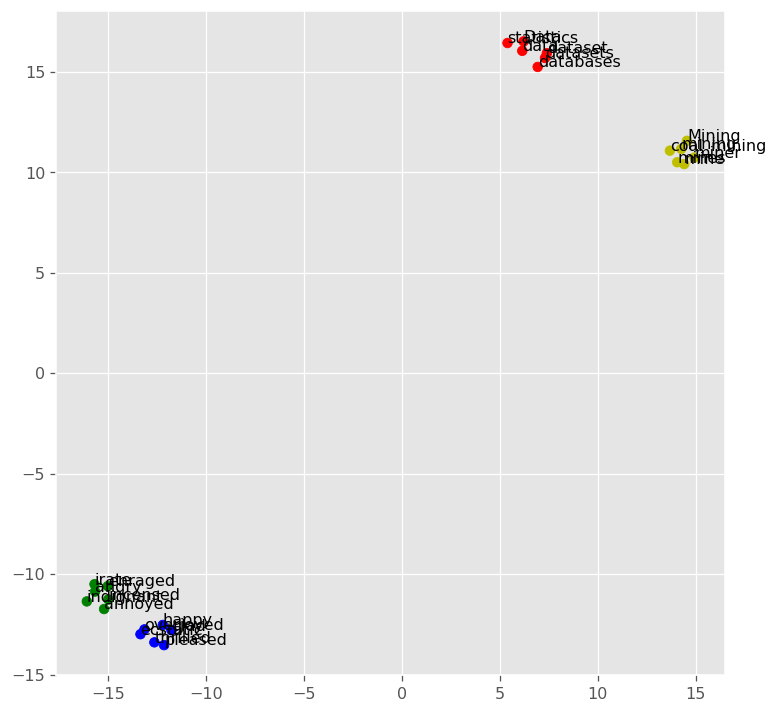

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors

size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]  # 224
X_train = model[word_train] # 這些字的向量 (224,300)

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

In [ ]:
target_words

['happy',
 'glad',
 'pleased',
 'ecstatic',
 'overjoyed',
 'thrilled',
 'angry',
 'irate',
 'enraged',
 'indignant',
 'incensed',
 'annoyed',
 'data',
 'Data',
 'datasets',
 'dataset',
 'databases',
 'statistics',
 'mining',
 'Mining',
 'mines',
 'coal_mining',
 'mine',
 'miner']

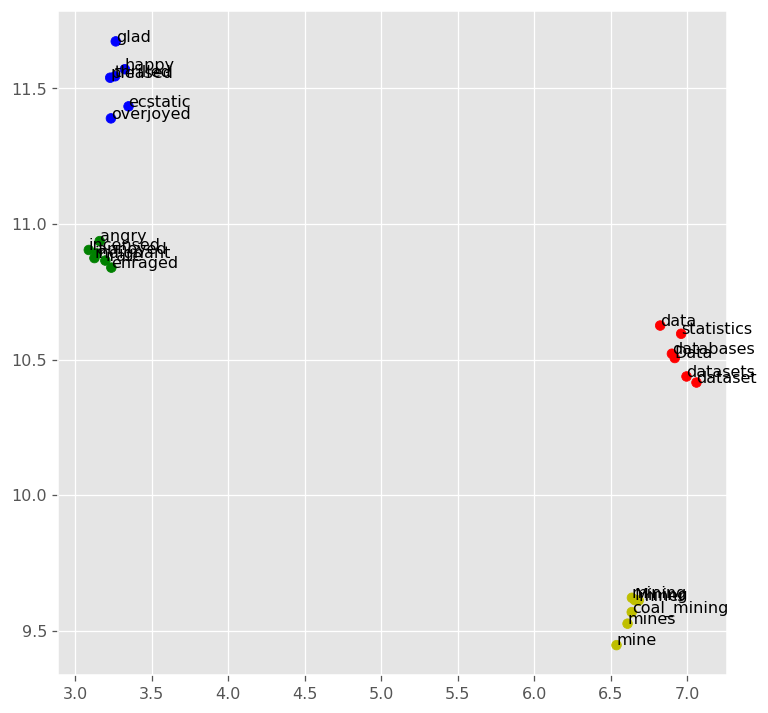

In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [ ]:
# Answer here

topn = 15

word_list = [ 'angry', 'happy', 'sad', 'fear' ]

angry_words = ['angry'] + [ word for word, _ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [ word for word, _ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [ word for word, _ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [ word for word, _ in w2v_google_model.most_similar('fear', topn=topn)]



print("Target words : ", word_list)
print("\nangry_top15 words : ", angry_words)
print("\nhappy_top15 words : ", happy_words)
print("\nsad_top15 words : ", sad_words)
print("\nfear_top15 words : ", fear_words)



Target words :  ['angry', 'happy', 'sad', 'fear']

angry_top15 words :  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']

happy_top15 words :  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']

sad_top15 words :  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']

fear_top15 words :  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']


In [ ]:
## w2v model
model = w2v_google_model

## prepare training word vectors

target_words = angry_words + happy_words + sad_words + fear_words

X_train = model[target_words] # (64,300):64 words, each has 300 dim


print("Train_dim : ", X_train.shape)

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)  # 降維至二維 # metric 代表向量間度量的方式

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28) # 降維至二維 # (64,2)


## training
X_tsne = tsne.fit_transform(X_train)
print("TSNE_dim : ", X_tsne.shape)

## training
X_umap = umap_model.fit_transform(X_train)
print("Umap_dim : ", X_tsne.shape)

# color list

color_list = ["b"] * (topn+1) + ["r"]*(topn+1) + ["g"]*(topn+1) + ["y"]*(topn+1)

Train_dim :  (64, 300)
TSNE_dim :  (64, 2)
Umap_dim :  (64, 2)


In [ ]:
from adjustText import adjust_text # import adjust_texts to avoid text mapping

9 [ 0.77254462 -0.26406348]
31 [-0.5674024  -0.53983137]


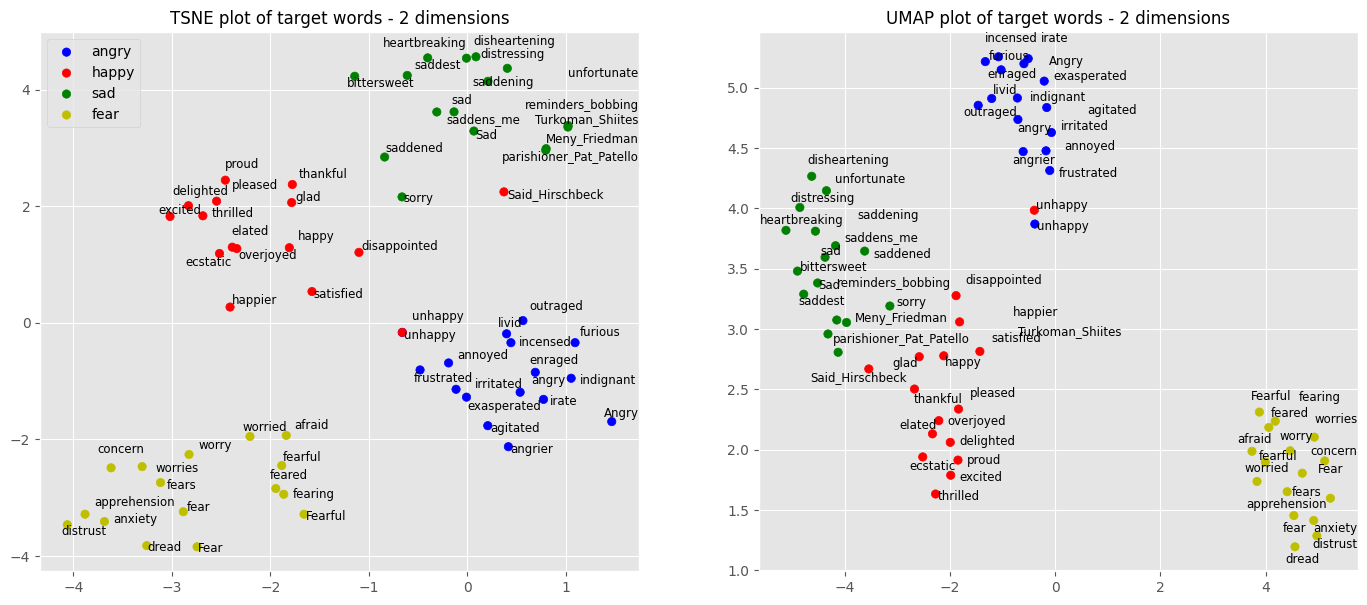

In [ ]:
plt.figure(figsize = [17,7])

plt.subplot(1,2,1)

index = np.arange(0, (topn+1)*5, topn+1)
ax_list = []

for i in range(0, 3+1):
    ax_list.append( plt.scatter(X_tsne[index[i]:index[i+1],0], X_tsne[index[i]:index[i+1],1], c = color_list[index[i]:index[i+1]]) )


plt.legend(tuple(ax_list), word_list)

text_place = [ plt.text(X_tsne[t,0], X_tsne[t,1], word, size = 8.5) for t, word in enumerate(target_words) ]

adjust_text(text_place,
            only_move = {'text' : 'xy'})   # only_move : moving strategy ； key ('points'、'text'、'objects') : value('xy'、'x'、'y')


plt.title("TSNE plot of target words - 2 dimensions", size = 12)

#---------------------------------------------------------------------------------------

plt.subplot(1,2,2)

plt.scatter(X_umap[:,0], X_umap[:,1], c = color_list, )

text_place = [plt.text( X_umap[t,0], X_umap[t,1], word, size = 8.5) for t, word in enumerate(target_words) ]

adjust_text(text_place,
            only_move = {'text' : 'xy'})


plt.title("UMAP plot of target words - 2 dimensions", size = 12)


plt.show()

- **Difference_1** : Different distance between class

   Based on the figures above, in my opinion, UMAP seperates slightly better than T-SNE (blue & red).
  According to reference, T-SNE usually need extremely high perplexity to see global structure.

    On the other hand, UMAP has two primary phases :

      1. Graph construction : In order to construct weight graph, UMAP decide point redius locally ( depending on two params ( number of neighbors & min_distance) ), and this design can strike a balance between local and global structure. Ex: Higher number of neighbors, better global structure. Lower min_distance, better global structure.

      2. Optimization : Similar with T-SNE
      
    However, **T-SNE is good at retaining local structure**, because it will measure the similarity (distance) between data points and representing  it as possibility in high dimension. Then construct similiar distribution. ( High dimension : Gaussion Dist. Low dimension : T-dist. ) And the objective function uses KL-divergence to minimize to difference between High dimension and Low dimension to keep the original local structure.
    
- **Difference_2** : Different distance inside same class
    
    As forementioned, UMAP strikes a balance between global and local structure. However, **T-SNE actually is good at retaining local structure**, because it will measure the similarity (distance) between data points (neighbors) and representing  it as possibility in high dimension. Then **construct similiar distribution**. (High dimension : Gaussion Dist. Low dimension : T-dist.) And the objective function uses KL-divergence to minimize the difference between the High dimension and Low dimension to keep the original local structure.

ref : [Understanding UMAP](https://pair-code.github.io/understanding-umap/)

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs:
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:
![pic10.png](attachment:pic10.png)

In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models:
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [ ]:
import ollama

response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

2024-11-21 13:35:03,183 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


**Data Mining**

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and statistical techniques to extract valuable information or knowledge from raw data.

### Types of Data Mining

*   **Supervised Learning**: The algorithm is trained on labeled data to make predictions on new, unseen data.
*   **Unsupervised Learning**: The algorithm identifies patterns and relationships in unlabeled data.
*   **Semi-Supervised Learning**: A combination of supervised and unsupervised learning techniques.

### Data Mining Techniques

1.  **Clustering**: Grouping similar data points into clusters based on their characteristics.
2.  **Association Rule Learning**: Discovering relationships between variables in a dataset.
3.  **Decision Trees**: Building tree-like models to predict outcomes based on input features.
4.  **Regression Analysis**: Modeling the relationship between input feature

In [ ]:
response

{'model': 'llama3.2',
 'created_at': '2024-11-21T05:35:03.0893001Z',
 'message': {'role': 'assistant',
  'content': '**Data Mining**\n================\n\n### Definition\n\nData mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and statistical techniques to extract valuable information or knowledge from raw data.\n\n### Types of Data Mining\n\n*   **Supervised Learning**: The algorithm is trained on labeled data to make predictions on new, unseen data.\n*   **Unsupervised Learning**: The algorithm identifies patterns and relationships in unlabeled data.\n*   **Semi-Supervised Learning**: A combination of supervised and unsupervised learning techniques.\n\n### Data Mining Techniques\n\n1.  **Clustering**: Grouping similar data points into clusters based on their characteristics.\n2.  **Association Rule Learning**: Discovering relationships between variables in a dataset.\n3.  **Decision Trees

**We can use the IPython library to make the response look better:**

In [ ]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [ ]:
display(Markdown(response['message']['content']))

NameError: name 'response' is not defined


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

- System : Define the **responding style** of LLM or the **tone** of conversation to indicate the command we want to make to LLM.

In [ ]:
user_question = "What is Poisson Distribution ? "

system_setting = 'You are a statistician intrested in Europe history. Please connect your response with history of Europe.'

response= ollama.chat(model='llama3.2', messages=[

    {'role': 'system','content': system_setting},
    {'role' : 'user', 'content' : user_question}

])

print(response['message']['content'])

2024-11-21 14:00:50,432 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


The Poisson distribution! A fundamental concept in statistics, particularly in the context of European history.

Named after French mathematician Siméon Denis Poisson (1781-1840), who first introduced it in 1837, the Poisson distribution is a discrete probability distribution that models the number of events occurring within a fixed interval of time or space.

In the context of European history, the Poisson distribution can be used to analyze the occurrence of significant events, such as wars, famines, plagues, or economic downturns. For instance:

1. **War frequency**: The number of wars fought in Europe between 1500 and 1800 can be modeled using a Poisson distribution, assuming that the average rate of war remains constant over time.
2. **Famine patterns**: The occurrence of famines in Europe during the 17th century, such as the Great Irish Potato Famine (1845-1852), can be analyzed using a Poisson distribution to understand the probability of famine events occurring within a given t

In [ ]:
user_question = "Can you explain what's the meaning of thread in Android Studio ? "

system_setting = 'You are a humorous and easy-going engineer.'

response= ollama.chat(model='llama3.2', messages=[

    {'role': 'system','content': system_setting},
    {'role' : 'user', 'content' : user_question}

])

print(response['message']['content'])

2024-11-21 14:07:04,437 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


The thread - it's like the lifeblood of any app, right? In Android, a thread is essentially a separate flow of execution within an app. Think of it like a little road that can run concurrently with the main app logic.

In other words, when your app is running, there are many tasks happening simultaneously. Some of them might be drawing UI elements, handling user input, or performing I/O operations (like reading from the internet). These tasks, if done sequentially, would slow down the entire app.

That's where threads come in! By creating separate threads for these tasks, you can execute them concurrently, which is known as **multithreading**. This allows your app to stay responsive and performant, even when it's handling a lot of complex tasks.

Here are some scenarios where threads are particularly useful:

1. **Background tasks**: When loading large amounts of data from the internet or performing database queries, these operations can take a while. Running them on a separate thread 

- Assistant : as the name implies, this role is to help user answer questions by offering additional information.

In [ ]:
user_question = "What the meaning of 釋迦 ? "

response= ollama.chat(model='llama3.2', messages=[
    {'role' : 'user', 'content' : user_question}
])

print(response['message']['content'])

2024-11-21 14:43:12,567 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


釋迦 is a Chinese character consisting of two kanji characters:

釋 (sè) meaning "to release" or "to free"
迦 (jǔ) meaning "wild goose"

Together, 釋迦 can be translated to "free from wild" or "released from chaos". However, in Buddhist contexts, it is often used as a title for the historical Buddha Siddhartha Gautama, who is also known as釋迦牟尼 (Siddharthasvāmin) or 釋迦牟尼 Buddha.

In this context, the term "釋迦" refers to the Buddha's role as a liberator from suffering and ignorance. It symbolizes his teachings of enlightenment and the path to liberation from the cycle of birth and death (samsara).

So, in summary, 釋迦 is not just a character but also a title that embodies the Buddhist concept of freedom from chaos and suffering.


In [ ]:
assistant_setting = 'Xī Zhá is a kind of local fruits in Taiwan.'

user_question = "What the meaning of 釋迦 ? "

response= ollama.chat(model='llama3.2', messages=[
    {'role' : 'assistant', 'content' : assistant_setting},
    {'role' : 'user', 'content' : user_question}
])

print(response['message']['content'])

2024-11-21 14:45:41,747 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


A cultural reference!

In Chinese culture, 釋迦 (Xī Zhá) is a pinyin romanization of the Sanskrit name Bṛhaspati, which means "Bringer of Good Fortune" or "Fertile One".

However, in Taiwanese culture, specifically with regards to the fruit Xī Zhā (, also known as Yuzu), the character 釋迦 might be a reference to Bodhidharma (also known as Da Mo), a 5th-century Indian monk and Buddhist patriarch who is said to have introduced Buddhism to China.

It's possible that the name Xī Zhā is a colloquialism or a nickname for the fruit, referencing its supposed medicinal properties or auspicious connotations. However, without further information, it's difficult to say for certain what the significance of 釋迦 is in this context.


### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

![example1.png](attachment:example1.png)
source: https://cooljapan-videos.com/tw/articles/epe0y86g

![example2.jpg](attachment:example2.jpg)
source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [ ]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

2024-11-21 15:53:22,616 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"


In the heart of a verdant field, a small dog with tan and white fur is captured in mid-air. The dog's body is arched gracefully as it leaps towards the left side of the frame, its legs fully extended beneath it. Its tongue lolls out in a pant, suggesting exertion or excitement. The field beneath the dog is a vibrant green, dotted with small blades of grass that sway gently in the breeze.

The background is a soft blur of white and gray, providing contrast to the bright colors of the foreground. It appears to be an outdoor setting, possibly near some buildings or trees just outside the frame. The focus is clearly on the dog's energetic leap, making it the star of this lively scene.

The image beautifully captures a moment of joy and freedom, as the small dog takes flight in its playful pursuit.

In [ ]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

In the image, a gray tabby cat with white paws and chest is captured in mid-stride. Its tail is curved upwards, adding to its alert demeanor. The cat's ears are perked up and it gazes directly into the camera, creating an engaging interaction between the viewer and the subject. All of this action unfolds against a stark white background that contrasts with the cat's gray fur pattern. The image is slightly blurred, which lends a sense of motion to the scene. Despite the simplicity of the setting, the image effectively showcases the cat's alertness and movement.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [ ]:
# Answer here


### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation ( RAG 結合文件檢索及生成能力 ). In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

RAG 主要由
1. 檢索器 : 負責從外部知識庫檢索相關知識訊息
2. 生成器 : 利用檢索到的知識生成回應

In [7]:
# !pip install colab-xterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 6.3 MB/s eta 0:00:00


In [8]:
# !pip install colab-xterm
%load_ext colabxterm

In [4]:
#Download ollama
# !curl -fsSL https://ollama.com/install.sh | sh
import subprocess
process = subprocess.Popen("ollama serve", shell=True) #runs on a different thread

In [ ]:
# Download model llama 3.2
!ollama pull llama3.2

^C


In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh
ollama pull llama3

In [9]:
# 打開終端機
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [ ]:
# 在終端機輸入下載ollama指令 $ curl -fsSL https://ollama.com/install.sh | sh
# 執行ollama $ ollama serve &
# 在終端機下載合適的語言模型 $ ollama pull llama3

In [11]:
!pip install langchain
!pip install langchain-core
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.19
    Uninstalling langchain-core-0.3.19:
      Successfully uninstalled langchain-core-0.3.19
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.7
    Uninstalling langchain-0.3.7:
      Successfully uninstalled langchain-0.3.7


In [13]:
pip install ollama

In [17]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 14.1
    Uninstalling websockets-14.1:
      Successfully uninstalled websockets-14.1
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [18]:
# import library
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gensim
import tensorflow
import keras
import langchain
import langchain_community
import langchain_core
import bs4
import chromadb
import gradio
%matplotlib inline
print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.3.3
tensorflow: 2.17.1
keras: 3.5.0


In [53]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
import os
import re

In [20]:
llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
# source -> load -> transform -> embed -> Vector Space

def load_and_retrieve_docs(url):

    loader = WebBaseLoader(   # WebBaseLoader是langchain內的東西以獲取網頁內容 # 輸出Document(page_content="網頁內容", metadata={"title": "網頁標題", ...})
        web_paths=(url,),   # web_paths 可以是 web_path: str | Sequence[str] = ''
        bs_kwargs=dict()
    )
    docs = loader.load() # We will load the URL that will serve as our data source # 文章內容
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    print(splits) # You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) # Our vector space for comparison

    return vectorstore.as_retriever()

url = "https://www.ibm.com/topics/large-language-models"

# Create the retriever
retriever = load_and_retrieve_docs(url) # 之後 retriever.invoke(問題) 去做retrieve

[Document(metadata={'source': 'https://www.ibm.com/topics/large-language-models', 'title': 'What Are Large Language Models (LLMs)? | IBM ', 'description': 'Large language models are AI systems capable of understanding and generating human language by processing vast amounts of text data.\r\n\r\n\r\n\r\n', 'language': 'en'}, page_content='What Are Large Language Models (LLMs)? | IBM \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nHome\n\n\n\n\nTopics\n\n\n\nLarge language models\n\n\n\n                    \n\n\n\n  \n    What are large language models (LLMs)?\n\n\n\n\n\n\n    \n\n\n                \n\n\n\n\nExplore IBM Granite AI models\n\n\nSign up for AI updates\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n\n\n\n    What are LLMs?\n\n\n\n\n\n    \n\n\n            \n        \n\n\n\n\nLarge language models (LLMs) are a category of foundation models tr

<ipython-input-20-9fe3d9ebea4d>:15: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model


In [36]:
temp = text_splitter.create_documents(text_documents)
# text_splitter.split_documents(temp)

In [44]:
print("before:", temp[0])

print("\n")

print("after:", text_documents[0])

before: page_content='Artificial Intelligence (AI) is a technology that simulates human intelligence and is widely applied in fields such as speech recognition, image processing, and natural language processing. With advancements in deep learning, AI has found applications in areas like medical diagnostics, financial analysis, and autonomous driving. In the future, AI is expected to play a significant role in education, energy management, and beyond, driving humanity toward a smarter, more efficient lifestyle.'


after: Artificial Intelligence (AI) is a technology that simulates human intelligence and is widely applied in fields such as speech recognition, image processing, and natural language processing. With advancements in deep learning, AI has found applications in areas like medical diagnostics, financial analysis, and autonomous driving. In the future, AI is expected to play a significant role in education, energy management, and beyond, driving humanity toward a smarter, more e

In [46]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
splits = text_splitter.split_documents(temp)

In [47]:
splits

[Document(metadata={}, page_content='Artificial Intelligence (AI) is a technology that simulates human intelligence and is widely applied in fields such as speech recognition, image processing, and natural language processing. With advancements in deep learning, AI has found applications in areas like medical diagnostics, financial analysis, and autonomous driving. In the future, AI is expected to play a significant role in education, energy management, and beyond, driving humanity toward a smarter, more efficient lifestyle.'),
 Document(metadata={}, page_content='Climate change has profound effects on the global environment, including rising sea levels, extreme weather events, and biodiversity loss. Communities worldwide are experiencing challenges such as droughts, floods, and heatwaves, which threaten agriculture and human livelihoods. To mitigate these impacts, governments and organizations are focusing on renewable energy, reforestation, and sustainable practices.'),
 Document(met

In [ ]:
# 連結關閉
import requests
s = requests.session()
s.proxies = { "https":"47.100.104.247:8080", "http":"36.248.10.47:8080" }
# s.headers = header
s.get(urls[0])

KeyboardInterrupt: 

In [28]:
url = "https://www.hawaiinewsnow.com/2024/11/23/christmas-tv-movies-are-their-taylor-swift-era-with-two-swift-inspired-films-airing-this-year/"
loader = WebBaseLoader(   # WebBaseLoader是langchain內的東西以獲取網頁內容 # load
        web_paths=(url,),
        bs_kwargs=dict()
    )
docs = loader.load() # We will load the URL that will serve as our data source # 文章內容

In [32]:
type(docs[0])

langchain_core.documents.base.Document

In [ ]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function

def ollama_llm(question, context): # 丟問題進去
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

The related solutions of IBM with LLMs are likely:

1. Watson Assistant: A cloud-based AI platform that uses LLMs to power conversational interfaces, helping businesses create more intuitive and personalized customer experiences.
2. Watson Natural Language Understanding (NLU): A capability that enables organizations to extract insights from unstructured data using LLMs, improving their ability to understand customer needs and preferences.
3. Watson Text Analytics: A solution that uses LLMs to analyze large volumes of text data, helping businesses uncover hidden patterns and trends in their customer feedback and reviews.
4. IBM Language Translation: An AI-powered platform that leverages LLMs to translate languages in real-time, enabling seamless communication across languages and cultures.
5. Watson Machine Learning: A suite of tools that uses LLMs to build, deploy, and manage machine learning models, helping businesses accelerate their AI adoption.

These solutions demonstrate IBM's commitment to harnessing the power of LLMs to drive business value, improve customer experiences, and stay ahead in the rapidly evolving AI landscape.


### **Actual content in the URL:**
![pic11.png](attachment:pic11.png)

source: https://www.ibm.com/topics/large-language-models



### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [107]:
# check if it's a url
from urllib.parse import urlparse
import time

In [97]:
def is_urls(url):
  try:
    temp = urlparse(url)
    return all([temp.scheme, temp.netloc]) # all(iterable) 內部是否都為真
  except:
    return False

In [21]:
urls = [ "https://www.ibm.com/topics/large-language-models", "https://time.com/7177874/teen-video-viewing-guidance-apa/", "https://time.com/7177933/biden-trump-abortion-pill-mifepristone-access/" ]

text_documents = [
    "Artificial Intelligence (AI) is a technology that simulates human intelligence and is widely applied in fields such as speech recognition, image processing, and natural language processing. With advancements in deep learning, AI has found applications in areas like medical diagnostics, financial analysis, and autonomous driving. In the future, AI is expected to play a significant role in education, energy management, and beyond, driving humanity toward a smarter, more efficient lifestyle.",
    "Climate change has profound effects on the global environment, including rising sea levels, extreme weather events, and biodiversity loss. Communities worldwide are experiencing challenges such as droughts, floods, and heatwaves, which threaten agriculture and human livelihoods. To mitigate these impacts, governments and organizations are focusing on renewable energy, reforestation, and sustainable practices.",
    "Space exploration began in the mid-20th century, with the launch of Sputnik 1 by the Soviet Union in 1957. Since then, humanity has achieved milestones such as landing on the Moon, deploying the International Space Station (ISS), and exploring Mars with rovers. The future of space exploration includes ambitious goals like building lunar bases, sending humans to Mars, and searching for extraterrestrial life."
    ]


In [112]:
# Answer here

# 擷取(retriver)

def load_and_retrieve_docs(docs):
  '''
  param:
    docs:list[str] ( can include links or string(texts) )
  output:
    vectorbase
  '''

  text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)  # splitter
  embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model

  transformed_docs = [] # store documents

  for doc in docs:
    if is_urls(doc):
      loader = WebBaseLoader(
            web_paths=(doc,),
            bs_kwargs=dict() )
      temp = loader.load() # We will load the URL that will serve as our data source # 文章內容
      transformed_docs.extend(temp)

    else:
      transform_document_type = text_splitter.create_documents([doc])
      transformed_docs.extend(transform_document_type)

    time.sleep(20)

  splits = text_splitter.split_documents(transformed_docs) # chunking our documents

  vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) # Our vector space for comparison

  return vectorstore

retriever = load_and_retrieve_docs(text_documents)


In [ ]:
def format_docs(docs): # 合併所有文件
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
# 生成回應 LLM model
def ollama_llm(question, context): # 丟問題進去  # 回傳回應
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question) # searched documents
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context) # 回傳回應


[Document(metadata={'source': 'https://time.com/7177874/teen-video-viewing-guidance-apa/', 'title': "Teens Are Stuck on Their Screens. Here's How to Protect Them | TIME", 'description': 'Psychologists are calling on parents, educators, policymakers, and content creators to make video-viewing healthier for teens.', 'language': 'en'}, page_content='Teens Are Stuck on Their Screens. Here\'s How to Protect Them | TIMESign Up for Our Ideas Newsletter POVSubscribeSubscribeSectionsHomeU.S.PoliticsWorldHealthClimateFuture of Work by CharterBusinessTechEntertainmentIdeasScienceHistorySportsMagazineTIME 2030Next Generation LeadersTIME100 Leadership SeriesTIME StudiosVideoTIME100 TalksTIMEPiecesThe TIME VaultTIME for HealthTIME for KidsTIME EdgeTIMECO2Red Border: Branded Content by TIMECouponsPersonal Finance by TIME StampedShopping by TIME StampedJoin UsNewslettersSubscribeGive a GiftShop the TIME StoreTIME Cover StoreDigital MagazineCustomer CareUS & CanadaGlobal Help CenterReach OutCareersPres

In [ ]:
# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")

display(Markdown(result))

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [ ]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [ ]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [ ]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [ ]:
df_train #We can see the new column with the embeddings

,id,text,emotion,intensity,text_tokenized,embeddings
289,10289,Fake people irritate me,anger,0.562,"[Fake, people, irritate, me]","[-1.8728137016296387, 0.2189236432313919, 3.88..."
917,20060,"@Montel_Williams If this ban goes through, it ...",fear,0.845,"[@, Montel_Williams, If, this, ban, goes, thro...","[-0.014073515310883522, 1.9721145629882812, 0...."
1979,21122,my mom recorded nightmare before Christmas for...,fear,0.140,"[my, mom, recorded, nightmare, before, Christm...","[-0.2742822766304016, 0.2634892463684082, 0.05..."
361,10361,I don't get what point is made when reporting ...,anger,0.566,"[I, do, n't, get, what, point, is, made, when,...","[-1.5899983644485474, 0.8231377005577087, 1.56..."
2851,40024,Sometimes The Worst Place You Can Be Is In You...,sadness,0.854,"[Sometimes, The, Worst, Place, You, Can, Be, I...","[-0.3436698317527771, -0.059365224093198776, 1..."
...,...,...,...,...,...,...
622,10622,@SarahMi40605180 @kaileighhxo sorry to burst t...,anger,0.396,"[@, SarahMi40605180, @, kaileighhxo, sorry, to...","[0.29137951135635376, -1.0658130645751953, 0.5..."
1445,20588,The only thing scary about a 1-armed man tryin...,fear,0.479,"[The, only, thing, scary, about, a, 1-armed, m...","[-0.8721568584442139, -0.1499433070421219, 4.4..."
1674,20817,Why is it when you nap during the day you are ...,fear,0.375,"[Why, is, it, when, you, nap, during, the, day...","[-1.9261915683746338, -0.43619081377983093, -0..."
440,10440,@evanareteos :)) im now writing abt the changi...,anger,0.479,"[@, evanareteos, :, ), ), im, now, writing, ab...","[-1.8636298179626465, -1.8385425806045532, 0.6..."


In [ ]:
df_test #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
53,10910,Having a baby born too soon is #lifechanging 6...,anger,0.375,"[-1.067340612411499, -1.3958516120910645, -0.1..."
151,21214,I want to be a woman who #overcomes obstacles ...,fear,0.312,"[-2.683912992477417, 0.49226051568984985, 4.70..."
322,40835,"@Eeevah14 don't I know it, try not to fret my ...",sadness,0.333,"[-0.8447898030281067, -0.7449926733970642, 1.3..."
51,10908,"@reluctantnicko Don't ask, you don't get. Apol...",anger,0.427,"[1.2199738025665283, 0.5587350130081177, -3.25..."
28,10885,I wouldn't have #anger issues.....if she didn'...,anger,0.500,"[-1.867563247680664, -0.4374268352985382, 1.91..."
...,...,...,...,...,...
69,10926,If I spend even 5 minutes with you and you alr...,anger,0.812,"[-0.6011534929275513, 1.2422854900360107, 4.27..."
320,40833,@Barcabhoy1 Of course not. Didn't sink his stu...,sadness,0.396,"[0.3828466832637787, -1.3304917812347412, -0.0..."
316,40829,Folk Band 'Thistle Down' will be replaced by '...,sadness,0.417,"[-0.9879149198532104, 1.4683746099472046, 1.00..."
267,30896,It feels good to get outside for a minute and ...,joy,0.708,"[0.4653572738170624, 1.9512604475021362, -0.19..."


Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [ ]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.4610951008645533


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.40      0.44      0.42        84
        fear       0.53      0.54      0.53       110
         joy       0.45      0.43      0.44        79
     sadness       0.45      0.41      0.43        74

    accuracy                           0.46       347
   macro avg       0.46      0.45      0.45       347
weighted avg       0.46      0.46      0.46       347



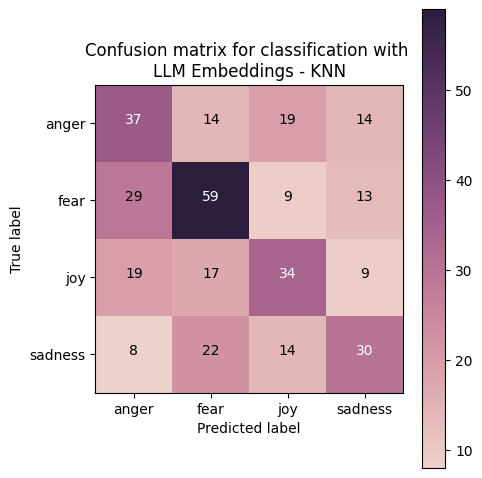

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [ ]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [ ]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [ ]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [ ]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [ ]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

In [ ]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [ ]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_1 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3987 - loss: 1.3328 - val_accuracy: 0.5274 - val_loss: 1.1608
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6315 - loss: 0.9031 - val_accuracy: 0.5850 - val_loss: 0.9942
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7407 - loss: 0.6773 - val_accuracy: 0.5908 - val_loss: 1.0926
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8009 - loss: 0.5453 - val_accuracy: 0.5764 - val_loss: 1.1191
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8353 - loss: 0.4480 - val_accuracy: 0.5821 - val_loss: 1.2691
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.3624 - val_accuracy: 0.5735 - val_loss: 1.3120
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8804 - loss: 0.3191 - val_accuracy: 0.5764 - val_loss: 1.4206
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9141 - loss: 0.2532 - val_accuracy: 0.

In [ ]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[3.4879174e-03, 7.9337490e-01, 2.0105434e-03, 2.0112669e-01],
       [1.8636035e-04, 9.9922419e-01, 5.4436974e-04, 4.4976925e-05],
       [4.4134462e-01, 1.4614439e-04, 6.5010696e-05, 5.5844420e-01],
       [6.0492437e-03, 4.4411428e-02, 5.8754980e-05, 9.4948047e-01],
       [8.0596912e-01, 1.7712364e-02, 1.3691780e-06, 1.7631720e-01]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'fear', 'sadness', 'sadness', 'anger'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.56


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.464157,1.199230,0.527378,1.160825
1,1,0.635760,0.878343,0.585014,0.994163
2,2,0.730141,0.690085,0.590778,1.092552
3,3,0.795184,0.564868,0.576369,1.119069
4,4,0.830888,0.454494,0.582133,1.269099
5,5,0.862441,0.384078,0.573487,1.312000
6,6,0.883200,0.316203,0.576369,1.420619
7,7,0.911154,0.263574,0.585014,1.556489
8,8,0.920011,0.221728,0.576369,1.601106
9,9,0.929698,0.196005,0.561960,1.633095


In [ ]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.58      0.43      0.49        84
        fear       0.56      0.73      0.63       110
         joy       0.65      0.53      0.58        79
     sadness       0.45      0.47      0.46        74

    accuracy                           0.56       347
   macro avg       0.56      0.54      0.54       347
weighted avg       0.56      0.56      0.55       347



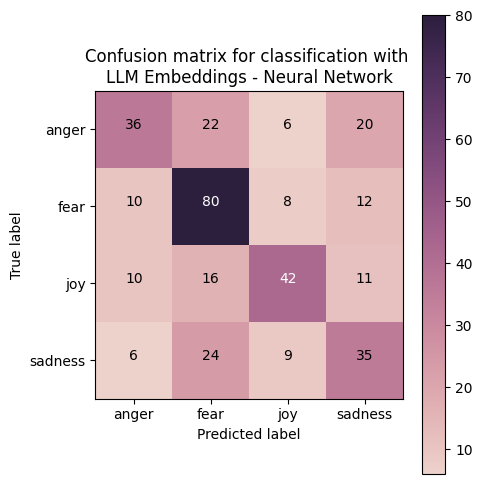

In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

In [ ]:
# Answer here


### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [ ]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2"

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Invalid response: frustration. Asking for reclassification.
Accuracy: 43.75%
              precision    recall  f1-score   support

       anger       0.43      0.60      0.50        20
        fear       0.00      0.00      0.00        20
         joy       0.41      0.70      0.52        20
     sadness       0.60      0.45      0.51        20

    accuracy                           0.44        80
   macro avg       0.36      0.44      0.38        80
weighted avg       0.36      0.44      0.38        80



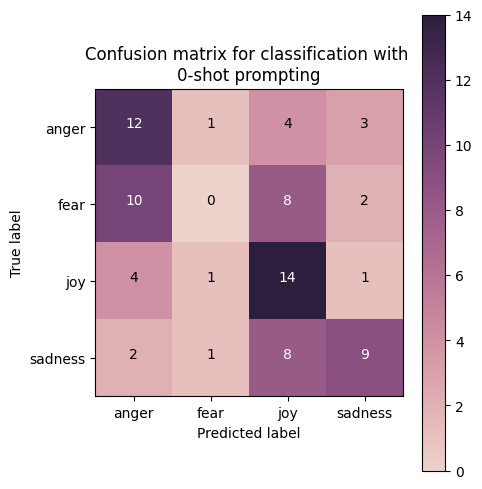

In [ ]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Candace &amp; her pout are getting right on my tits #GBBO
Emotion: anger

Text: okay i AHVE to start mob psycho 100 today. if i dont im going to fight myself
Emotion: fear

Text: @BbeautifulSoul_ u always gotta attitude tho ... 😕 cheer up
Emotion: joy

Text: @happyandbashful Flirt, simper, pout, repeat. Yuck.
Emotion: sadness


Accuracy: 46.25%
              precision    recall  f1-score   support

       anger       0.40      0.70      0.51        20
        fear       1.00      0.05      0.10        20
         joy       0.44      0.75      0.56        20
     sadness       0.70      0.35      0.47        20

    accurac

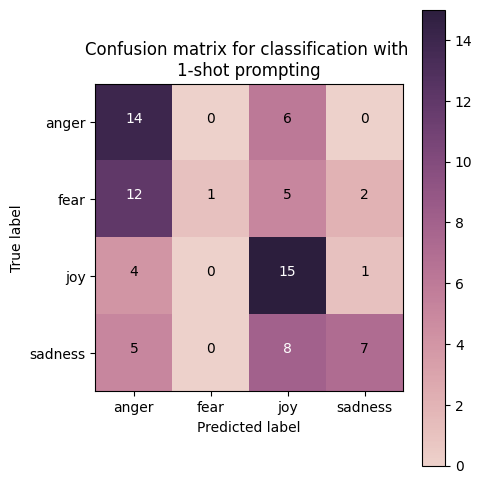

In [ ]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Candace &amp; her pout are getting right on my tits #GBBO
Emotion: anger

Text: @josephperson Cam is still rattled from the backlash he received when he made the black QB comment and suffered the wrath of White America.
Emotion: anger

Text: When someone rudely says all women should have long hair and your inner feminist tries not to rage
Emotion: anger

Text: SOMEONE LET SNAKES IN MY HOUSE, I BET IT @Ya_Boi_Huck I KILL THAT BUGGER WHEN I GET MY HANDS ON HIM #rage #HuckFP2
Emotion: anger

Text: Who got madden 17 or 2k17 ps4 add TrackdawgT lets run it
Emotion: anger

Text: okay i AHVE to start mob psycho 100 today. if i don

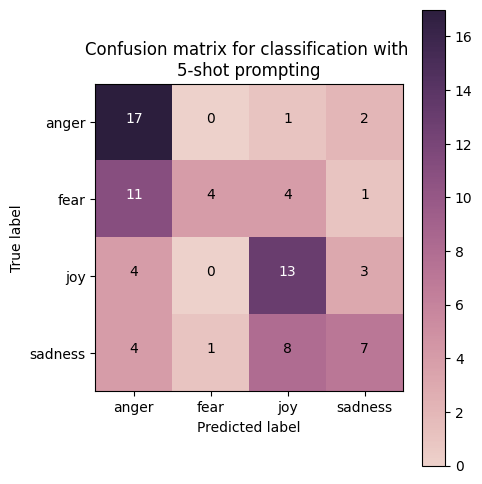

In [ ]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here


### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---